In [2]:
import sys
import pandas as pd
!pip install ema_workbench
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
sys.path.append("..")

/Users/aas6791/anaconda3/lib/python3.11/site-packages/ema_workbench/em_framework/__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


In [3]:
import rbf_functions
from rbf_functions import rbfs

In [4]:
rbfs =[
    rbf_functions.squared_exponential_rbf,
    rbf_functions.original_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = "./refsets/"
    results = pd.read_csv(output_dir + name + "_refset.csv")
    results["environment"] = 1 - results["environment"]

    pareto_sets[name] = results

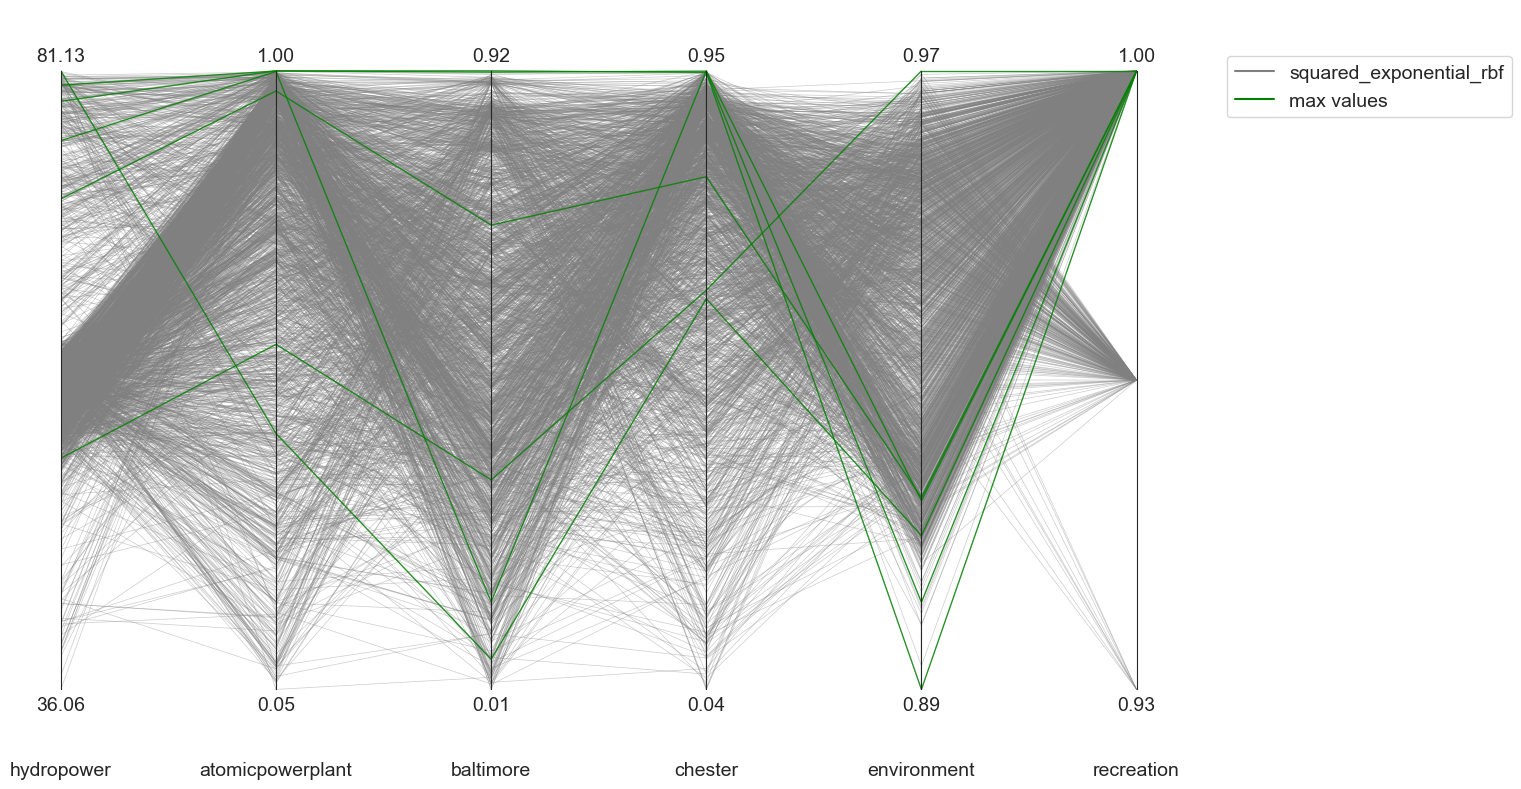

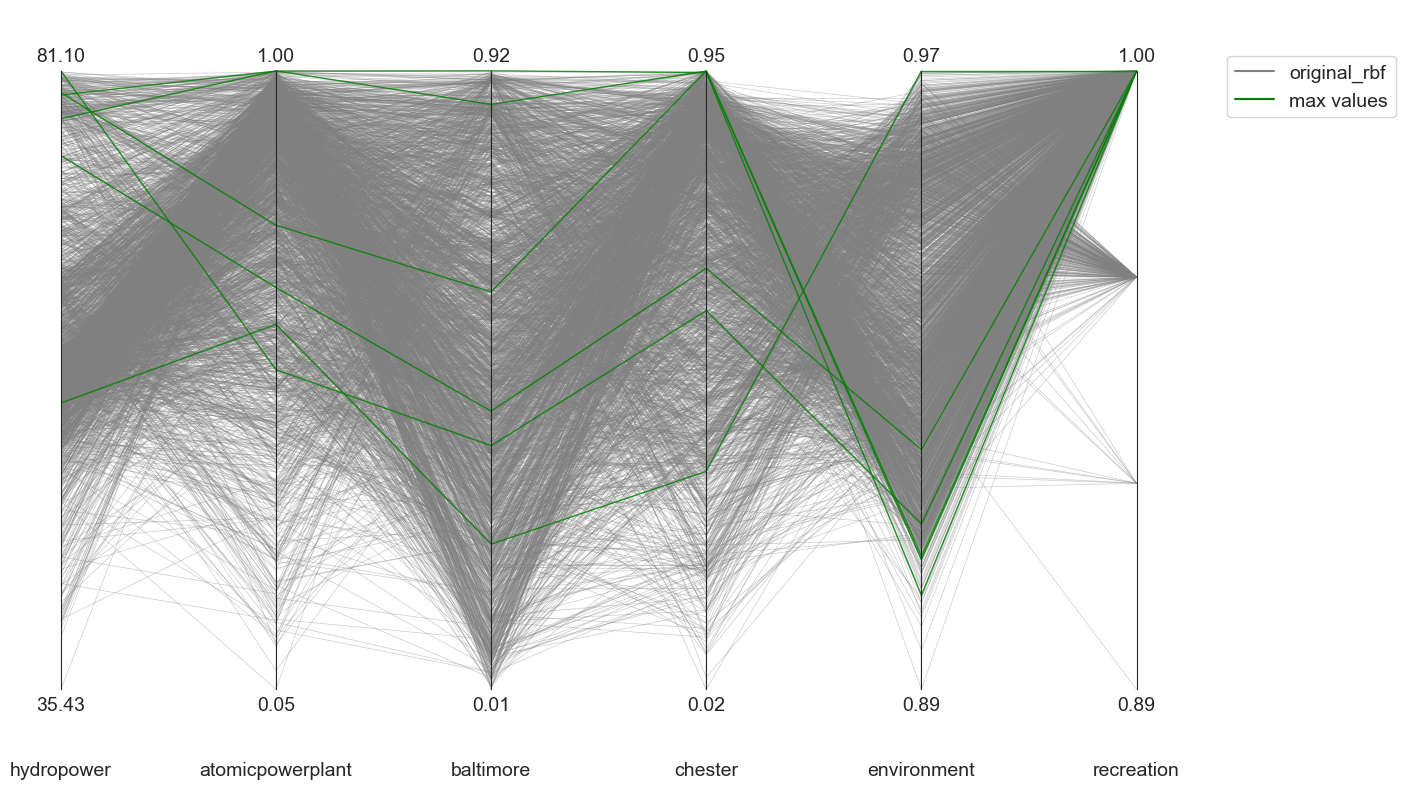

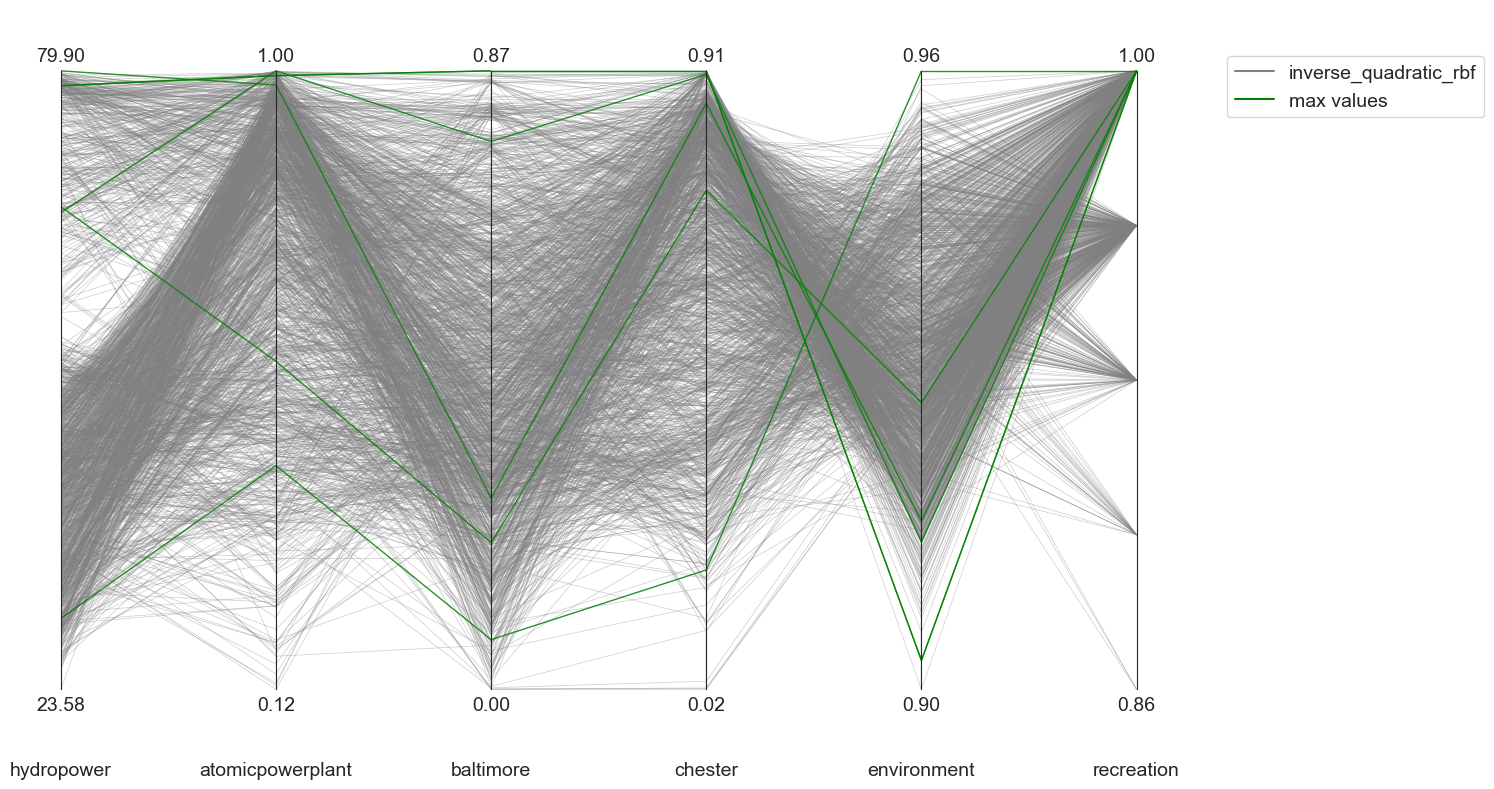

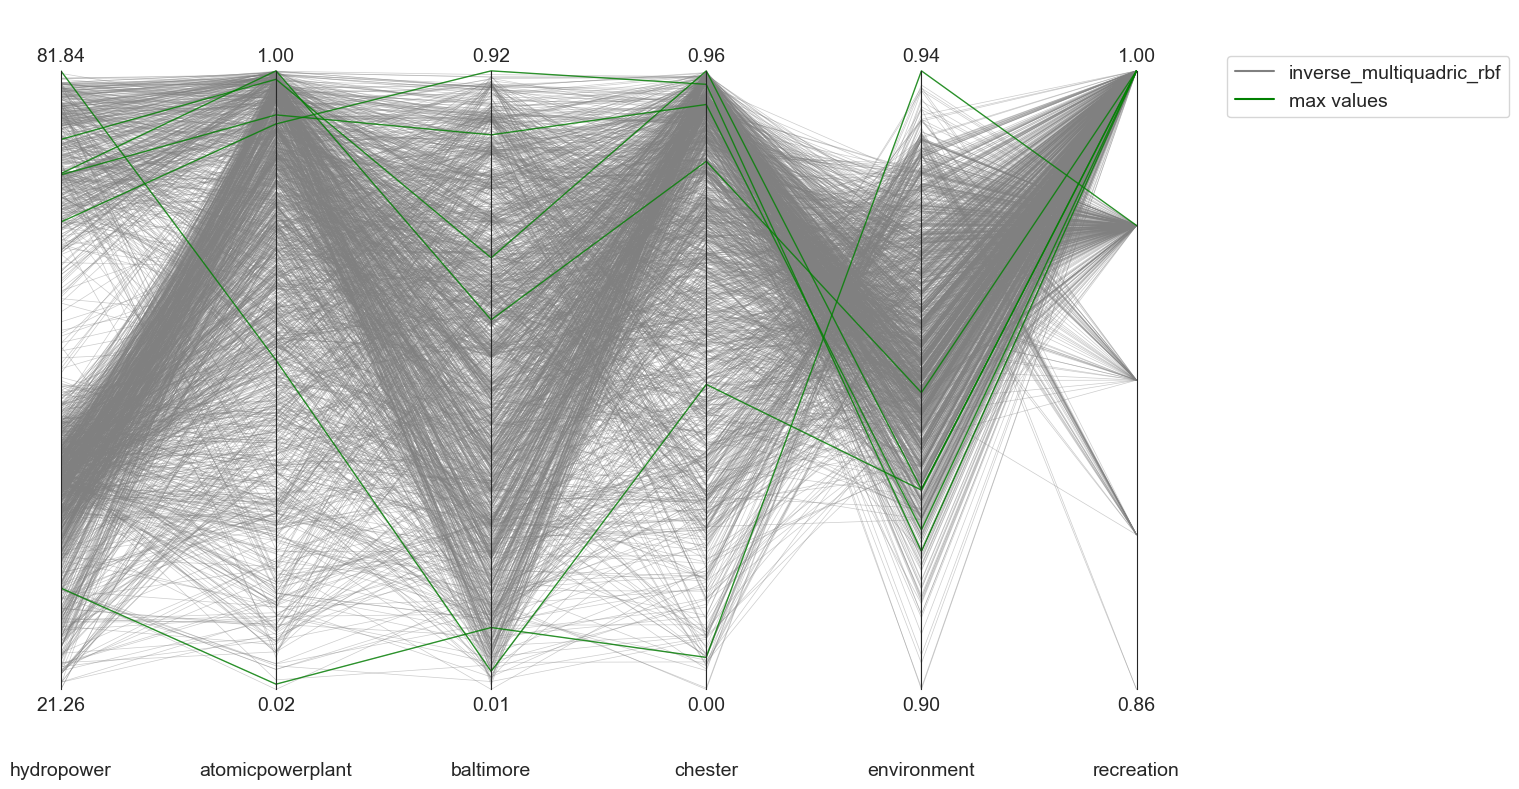

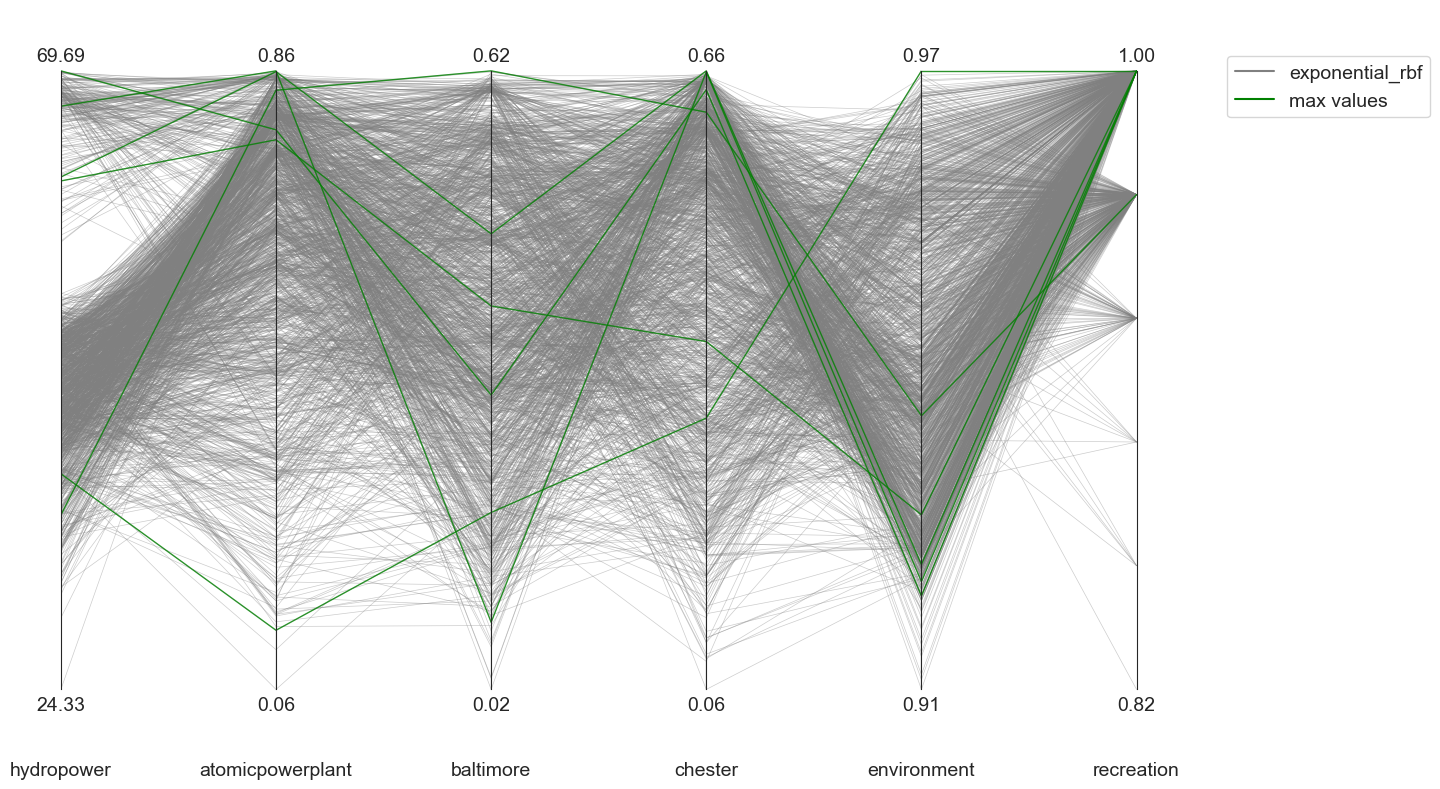

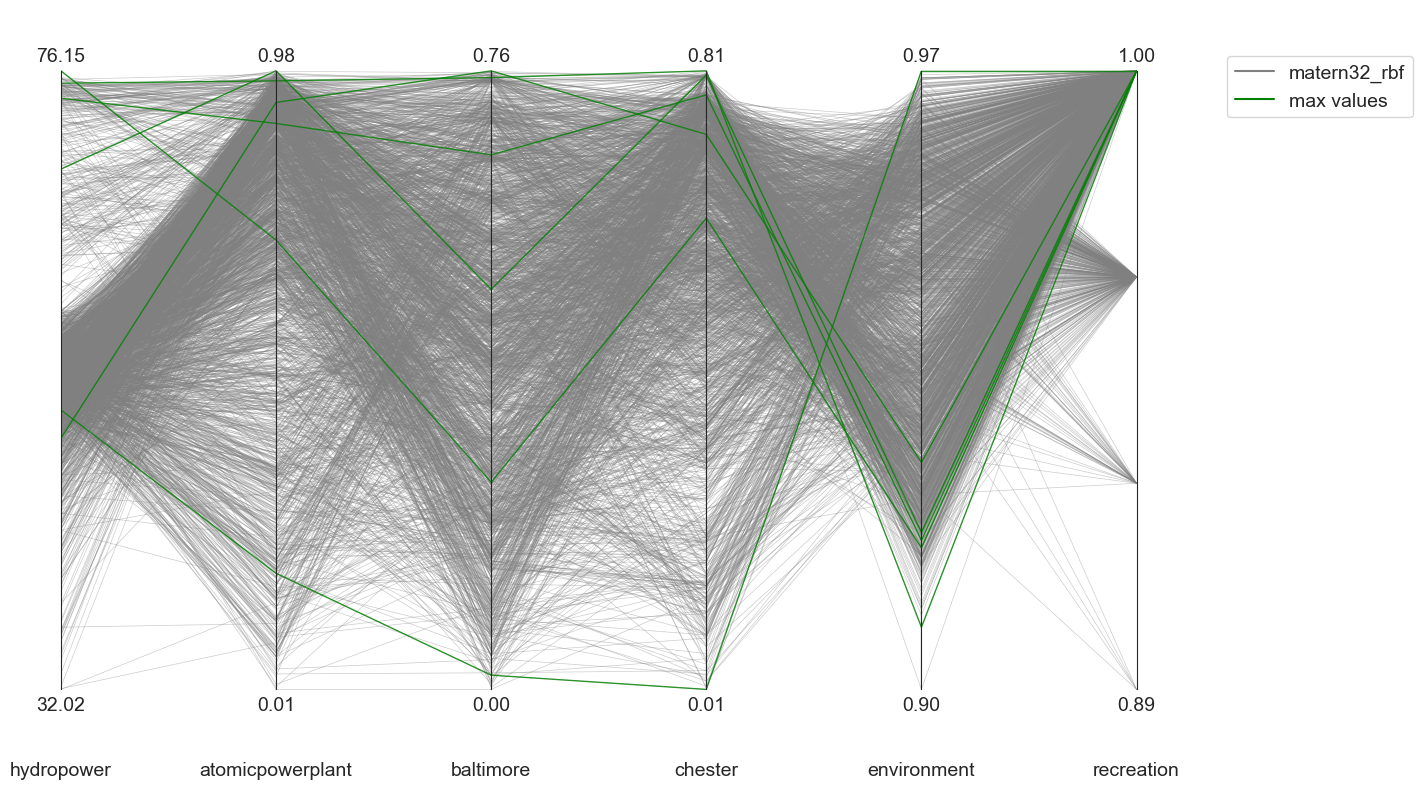

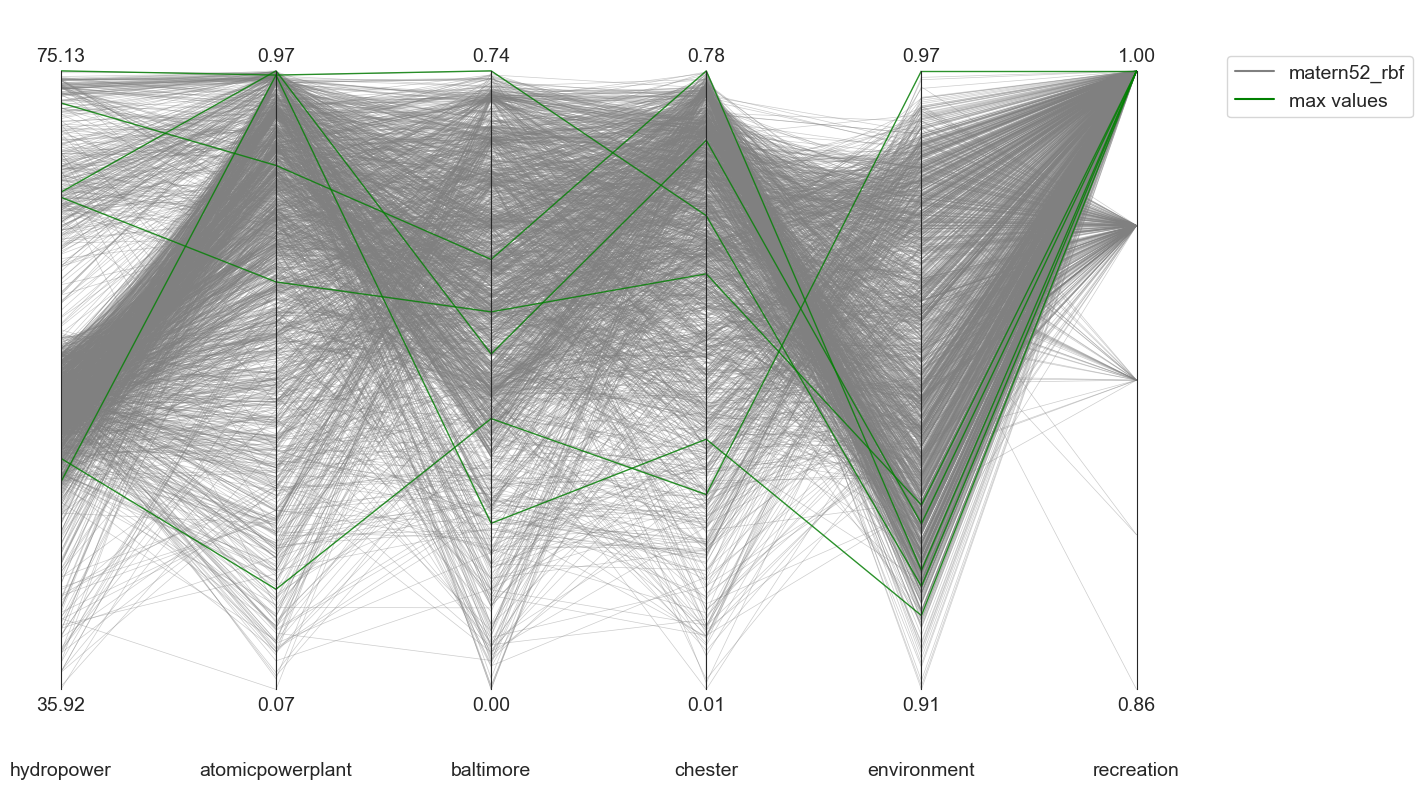

In [5]:
for entry in rbfs:
    name = entry.__name__
    df_rbf = pareto_sets[name].copy()

    df_max = pd.concat([df_rbf.loc[i] for i in df_rbf.idxmax()], axis=1).T
    df_min = pd.concat([df_rbf.loc[i] for i in df_rbf.idxmin()], axis=1).T

    limits = get_limits(df_rbf)
    axes = ParallelAxes(limits, rot = 0)
    axes.plot(df_rbf, label=name, lw=0.5, color="grey", alpha=0.4)
    axes.plot(df_max, label="max values", lw=1, color="green", alpha=0.8)
   # axes.plot(df_min, label="min values", lw=1, color="red", alpha=0.8)
    axes.legend()
    plt.savefig(f'figs/{name}/{name}_parcoords_minmax.svg')
    #plt.show()

In [6]:
df_se = pareto_sets["squared_exponential_rbf"].copy()
# print(df_se.max())
df_max = pd.DataFrame(columns=df_se.columns)
df_min = pd.DataFrame(columns=df_se.columns)

for i in df_se.idxmax():
    df_max = pd.concat([df_max, pd.DataFrame(df_se.loc[[i]])])

for i in df_se.idxmin():
    df_min = pd.concat([df_min, pd.DataFrame(df_se.loc[[i]])])

/var/folders/bs/pq8dwg2x1292xl2v3fdv89nxg6tx1q/T/ipykernel_88873/3392790158.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_max = pd.concat([df_max, pd.DataFrame(df_se.loc[[i]])])
/var/folders/bs/pq8dwg2x1292xl2v3fdv89nxg6tx1q/T/ipykernel_88873/3392790158.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_min = pd.concat([df_min, pd.DataFrame(df_se.loc[[i]])])


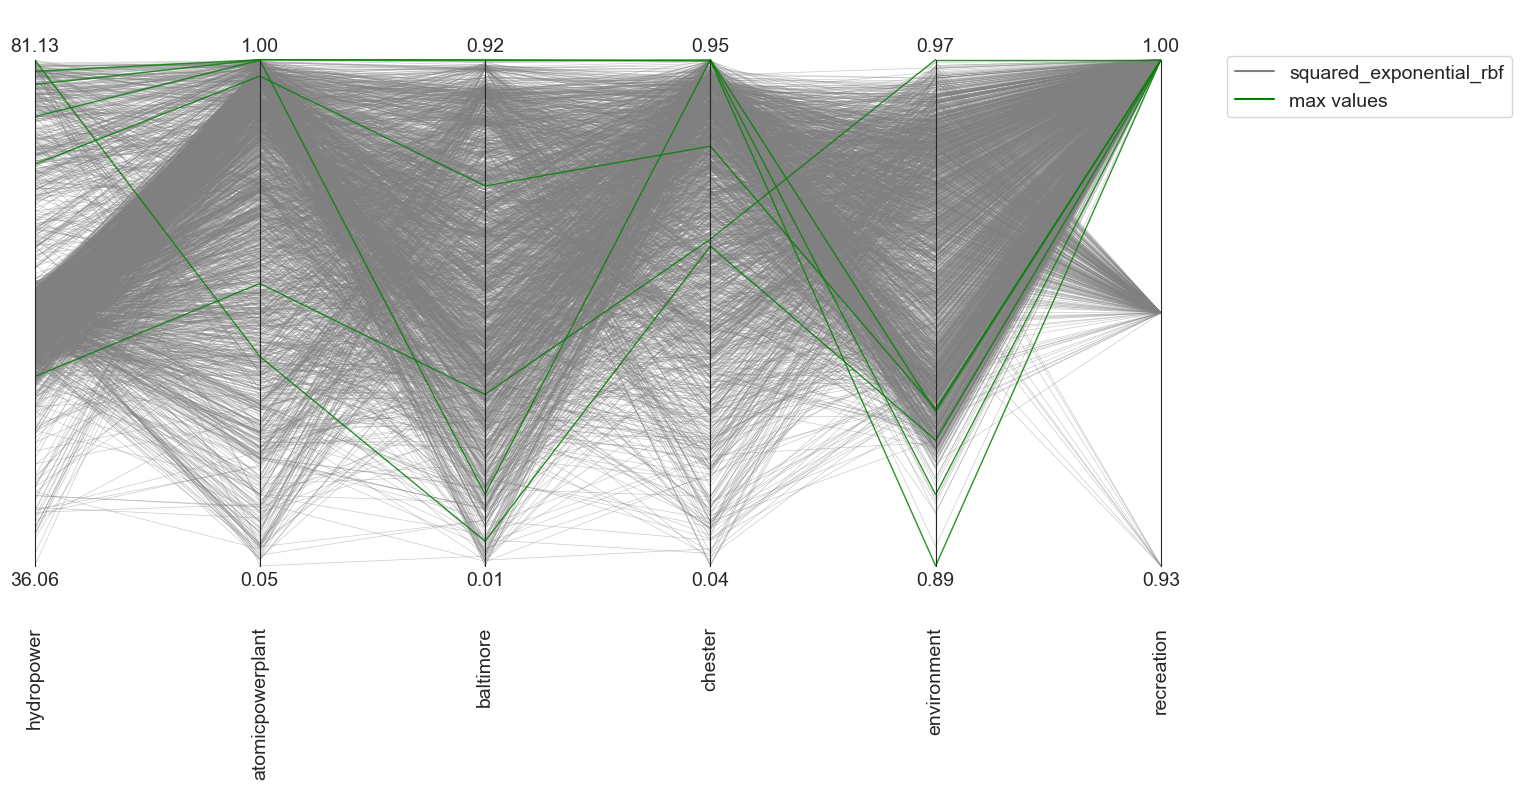

In [7]:
limits = get_limits(df_se)
axes = ParallelAxes(limits)
axes.plot(df_se, label="squared_exponential_rbf", lw=0.5, color="grey", alpha=0.4)
axes.plot(df_max, label="max values", lw=1, color="green", alpha=0.8)
# axes.plot(df_min, label='min values', lw=1, color='red', alpha=0.8)
axes.legend()
plt.show()

In [8]:
df_rbf = pareto_sets[name].copy()
cols = df_rbf.columns.to_list()
cols.append("index")
df_max = pd.DataFrame(columns=cols)
df_idxmax = df_rbf.idxmax()

for i in df_rbf.idxmax().items():
     print(df_rbf.loc[i[1]])
#     label=i[0]
#     ser = pd.Series(data=, index=['a', 'b', 'c'])
#     df_max = df_max.append(df_rbf.loc[i[1]])
#     df_max.set_index(i[0], inplace=True)

hydropower          75.132985
atomicpowerplant     0.962094
baltimore            0.200821
chester              0.325456
environment          0.912752
recreation           1.000000
Name: 268, dtype: float64
hydropower          67.440345
atomicpowerplant     0.968173
baltimore            0.401277
chester              0.696302
environment          0.922233
recreation           1.000000
Name: 270, dtype: float64
hydropower          49.072000
atomicpowerplant     0.962059
baltimore            0.736480
chester              0.602702
environment          0.915764
recreation           1.000000
Name: 1682, dtype: float64
hydropower          73.098573
atomicpowerplant     0.831324
baltimore            0.513245
chester              0.782422
environment          0.917410
recreation           1.000000
Name: 259, dtype: float64
hydropower          50.572257
atomicpowerplant     0.218117
baltimore            0.324855
chester              0.256740
environment          0.968969
recreation           1.00

In [9]:
df_rbf[df_rbf['recreation']==1]
df_rbf.where(df_rbf.eq(df_rbf.max(), axis=1)).stack()
coll = "hydropower"
df_temp = df_rbf[df_rbf[coll] == df_rbf[coll].max()]

In [18]:
df_max = pd.DataFrame(columns=df_rbf.columns)
df_temp.loc[:, "index"] = "recreation"
#df_max = df_max.append(df_temp) rewrote to avoid df.append depreciation warning
df_max = pd.concat([df_max, pd.DataFrame(df_temp)])
df_max.set_index("index")

   hydropower  atomicpowerplant  baltimore   chester  environment  recreation  \
0   67.124203          0.662807   0.451170  0.530573     0.924164         1.0   
1   66.731710          0.662187   0.450357  0.494679     0.927065         1.0   
2   68.529860          0.739738   0.617551  0.616480     0.921695         1.0   
3   62.826090          0.810146   0.487431  0.563531     0.926267         1.0   
4   58.919377          0.848570   0.619142  0.353105     0.922088         1.0   

        index  
0  recreation  
1  recreation  
2  recreation  
3  recreation  
4  recreation  


/var/folders/bs/pq8dwg2x1292xl2v3fdv89nxg6tx1q/T/ipykernel_88873/1064626054.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_max = pd.concat([df_max, pd.DataFrame(df_temp)])


In [11]:
df_max = pd.DataFrame(columns=df_rbf.columns)
# for i in df_max:

if len(df_temp) > 1:
    df_temp.loc[:, "hydropower"] = df_temp["hydropower"].div(100)
    maxval = df_temp.sum(axis=1).idxmax()
    print(df_temp.iloc[maxval])

In [12]:
df_rbf.idxmax()

hydropower           268
atomicpowerplant     270
baltimore           1682
chester              259
environment          692
recreation             0
dtype: int64

In [14]:
pd.options.mode.chained_assignment = None
plt.rcParams["figure.figsize"] = [12, 6]
for entry in rbfs:
    name = entry.__name__
    df_rbf = pareto_sets[name].copy()
    cols = list(df_rbf.columns)
    cols.append("index")
    df_max = pd.DataFrame(columns=cols)
    for i in df_max.columns[0:-1]:
        df_temp = df_rbf[df_rbf[i] == df_rbf[i].max()].reset_index()
        if len(df_temp) > 1:
            df_temp.loc[:, "hydropower"] = df_temp["hydropower"].div(100)
            maxval = df_temp.sum(axis=1).idxmax()
            df_temp.loc[:, "hydropower"] = df_temp["hydropower"].mul(100)
            df_temp2 = df_temp.iloc[maxval]
            df_temp2["index"] = i
            df_max = pd.concat([df_max, pd.DataFrame(df_temp2)])
        else:
            df_temp["index"] = i
            df_max = pd.concat([df_max, pd.DataFrame(df_temp)])

    df_max = df_max.set_index("index")
    
    print(df_max.head())

#Uncomment to generate parallel coords plot
  #  limits = get_limits(df_rbf)
  #  axes = ParallelAxes(limits, rot=0)
  #  axes.plot(df_rbf, label=name, lw=0.5, color="grey", alpha=0.4)

  #  for j, c in zip(df_max.iterrows(), sns.color_palette("bright")):
  #      axes.plot(j[1], label=f"max {j[0]}", color=c, lw=1.5, alpha=1)

  #  axes.legend()
  #  plt.savefig(f"figs/{name}/{name}_parcoords.jpg")
  #  plt.show()

                  hydropower  atomicpowerplant  baltimore   chester  \
index                                                                 
hydropower         81.128877          0.441536   0.054879  0.618586   
atomicpowerplant   78.910415          0.999840   0.917182  0.953013   
baltimore          80.085629          0.999713   0.919126  0.951174   
chester            76.041896          0.998803   0.138701  0.953449   
environment        52.902526          0.578810   0.318358  0.631186   

                  environment  recreation 1832  
index                                           
hydropower           0.911522         1.0  NaN  
atomicpowerplant     0.903330         1.0  NaN  
baltimore            0.892633         1.0  NaN  
chester              0.915806         1.0  NaN  
environment          0.968619         1.0  NaN  
                  hydropower  atomicpowerplant  baltimore   chester  \
index                                                                 
hydropower       

/var/folders/bs/pq8dwg2x1292xl2v3fdv89nxg6tx1q/T/ipykernel_88873/2510815634.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_max = pd.concat([df_max, pd.DataFrame(df_temp)])
/var/folders/bs/pq8dwg2x1292xl2v3fdv89nxg6tx1q/T/ipykernel_88873/2510815634.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'recreation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp2["index"] = i
/var/folders/bs/pq8dwg2x1292xl2v3fdv89nxg6tx1q/T/ipykernel_88873/2510815634.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude e

In [ ]:
limits = get_limits(df_se)
axes = ParallelAxes(limits, rot = 0)
axes.plot(df_max, label="max values", lw=1, alpha=1)
axes.legend()
plt.show()

In [ ]:
import seaborn as sns

# sns.color_palette()
# for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):

for entry, c in zip(rbfs, sns.color_palette()):
    name = entry.__name__
    boxp = pareto_sets[name].copy()
    boxp["hydropower"] = boxp["hydropower"] / 100
    sns.boxplot(data=boxp, width=0.5, color=c)
    plt.title(name)
    plt.suptitle("")
    plt.xlabel("")
    plt.ylabel("Reliability")
    plt.tight_layout()
    plt.savefig(f"figs/{name}/{name}_boxplot.jpg")
    plt.show()